In [ ]:
# Biểu diễn dưới  dạng onehot vector
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
words = ['anh', 'em', 'gia đình', 'bạn bè', 'anh', 'em']
le.fit(words)

print('Class of words: ', le.classes_)
# Biến đổi sang dạng số
x = le.transform(words)
print('Convert to number: ', x)
# Biến đổi lại sang class
print('Invert into classes: ', le.inverse_transform(x))

Class of words:  ['anh' 'bạn bè' 'em' 'gia đình']
Convert to number:  [0 2 3 1 0 2]
Invert into classes:  ['anh' 'em' 'gia đình' 'bạn bè' 'anh' 'em']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

oh = OneHotEncoder()
classes_indices = list(zip(le.classes_, np.arange(len(le.classes_))))
print('Classes_indices: ', classes_indices)
oh.fit(classes_indices)
print('One-hot categories and indices:', oh.categories_)
# Biến đổi list words sang dạng one-hot
words_indices = list(zip(words, x))
print('Words and corresponding indices: ', words_indices)
one_hot = oh.transform(words_indices).toarray()
print('Transform words into one-hot matrices: \n', one_hot)
print('Inverse transform to categories from one-hot matrices: \n', oh.inverse_transform(one_hot))

Classes_indices:  [('anh', 0), ('bạn bè', 1), ('em', 2), ('gia đình', 3)]
One-hot categories and indices: [array(['anh', 'bạn bè', 'em', 'gia đình'], dtype=object), array([0, 1, 2, 3], dtype=object)]
Words and corresponding indices:  [('anh', 0), ('em', 2), ('gia đình', 3), ('bạn bè', 1), ('anh', 0), ('em', 2)]
Transform words into one-hot matrices: 
 [[1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0.]]
Inverse transform to categories from one-hot matrices: 
 [['anh' 0]
 ['em' 2]
 ['gia đình' 3]
 ['bạn bè' 1]
 ['anh' 0]
 ['em' 2]]


# Word Embedding

## Phương pháp  SVD

Hiểu đơn giản thì  đây là một phương pháp giảm chiều dữ  liệu dựa trên một phép phân  tích suy biến nhắm tìm ra một ma trận sát với  ma trận ban đầu.
Về phương pháp khai triển và ứng dụng của SVD bạn đọc có thể tham khảo Singular value Decomposition. Đối với word embedding theo SVD, ta sẽ áp dụng phân tích suy biến trên ma trận đồng xuất hiện của các cặp từ input và output. Trong đó input là từ hiện tại và output là các từ liền kề xung quanh nó. Chẳng hạn chúng ta có 2 câu văn như sau:

Khoa học dữ liệu là một lĩnh vực đòi hỏi kiến thức về toán và lập trình. Tôi rất yêu thích khoa học dữ liệu.

Tập từ điển sẽ bao gồm các từ sau:

[khoa học, dữ liệu, là, một, lĩnh vực, đòi hỏi, kiến thức, về, toán, và, lập trình, tôi, rất, yêu, thích]

Khi đó biểu diễn các từ trong ma trận đồng xuất hiện như bên dưới:
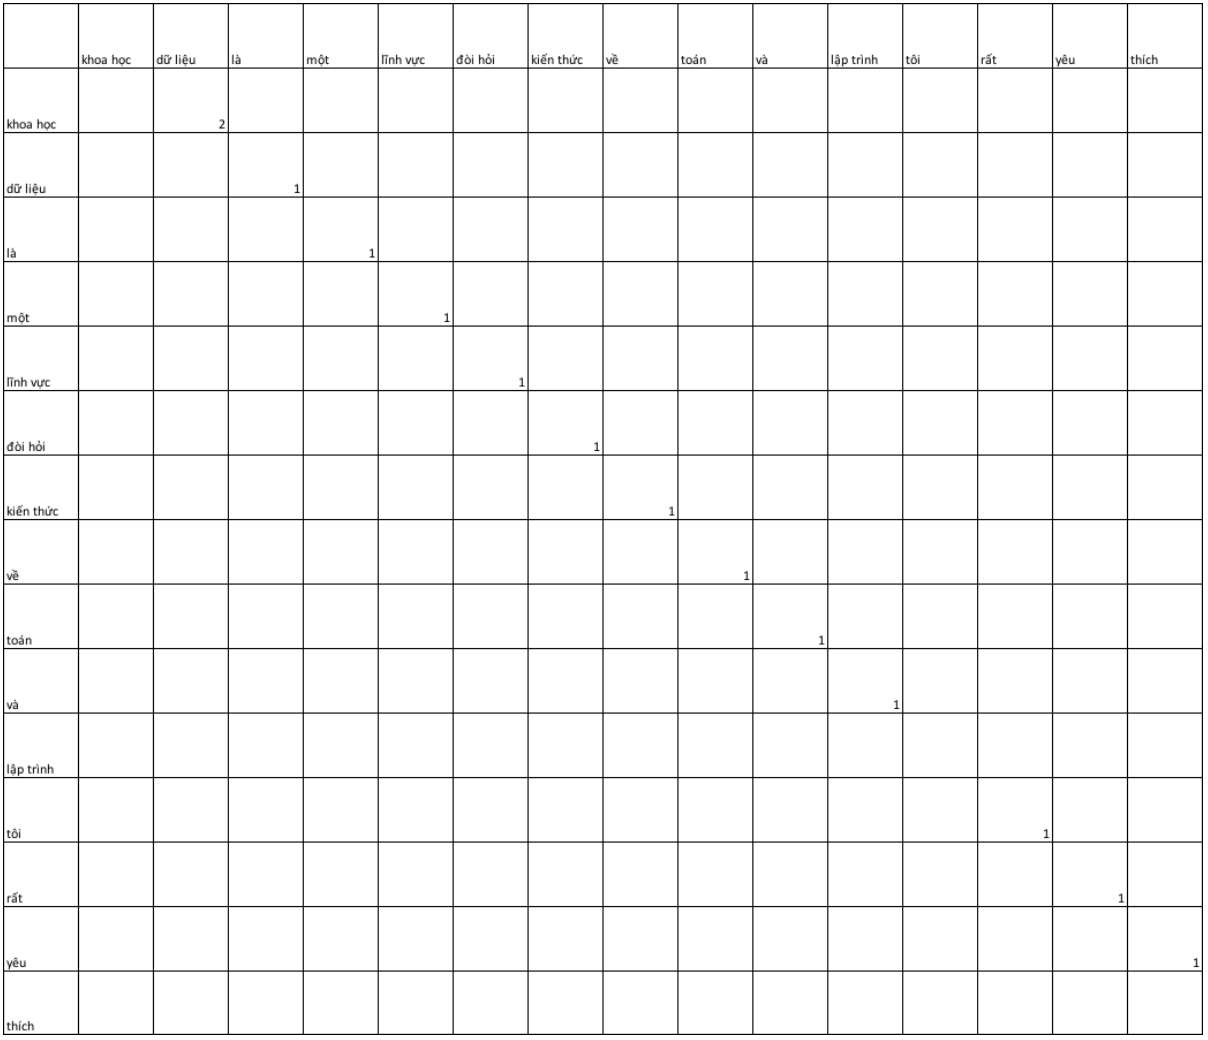

In [ ]:
!pip install underthesea

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 76.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 66.4 MB/s eta 0:00:00


In [ ]:
import scipy.linalg as ln
import numpy as np
from underthesea import word_tokenize

sentence = 'Khoa học dữ liệu là một lĩnh vực đòi hỏi kiến thức về toán và lập trình. Tôi rất yêu thích Khoa học dữ liệu.'
token = word_tokenize(sentence)
# Tokenize câu search
print('tokenization of sentences: ', token)

tokenization of sentences:  ['Khoa học', 'dữ liệu', 'là', 'một', 'lĩnh vực', 'đòi hỏi', 'kiến thức', 'về', 'toán', 'và', 'lập trình', '.', 'Tôi', 'rất', 'yêu thích', 'Khoa học', 'dữ liệu', '.']


In [ ]:
print(len(set(token)))

15


In [ ]:
from scipy.sparse import coo_matrix
# Tạo ma trận coherence dưới dạng sparse thông qua khai báo vị trí khác 0 của trục x và y
row = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13]
col = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14]
data =      [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

X = coo_matrix((data, (row, col)), shape=(15, 15)).toarray()
X

array([[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
# Thực hiện phân tích suy biến:
U, S_diag, V = ln.svd(X)
print('Shape of U: ', U.shape)
print('Length of diagonal: ', len(S_diag))
print('Shape of V: ', V.shape)

Shape of U:  (15, 15)
Length of diagonal:  15
Shape of V:  (15, 15)


## Phương Pháp autoencoder

In [ ]:
from keras.layers import Dense, Input
from keras.models import Model, Sequential
from keras.optimizers import RMSprop, Adam

def autoencoder(input_unit, hidden_unit):
    # Khởi một hidden có sẵn
    model = Sequential()
    # Thêm từng hidden layer vô
    model.add(Dense(input_unit, input_shape = (15,), activation = 'relu'))
    model.add(Dense(hidden_unit, activation = 'relu'))
    model.add(Dense(input_unit, activation = 'softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer = Adam(),
                 metrics = ['accuracy'])
    model.summary()
    return model

# Cho số node input và output
model_auto = autoencoder(input_unit = 15, hidden_unit = 6)

# Đưa X train Y train vô
model_auto.fit(X, X, epochs = 5, batch_size = 3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                240       
                                                                 
 dense_1 (Dense)             (None, 6)                 96        
                                                                 
 dense_2 (Dense)             (None, 15)                105       
                                                                 
Total params: 441 (1.72 KB)
Trainable params: 441 (1.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
5/5 [==============================] - 8s 10ms/step - loss: 2.5736 - accuracy: 0.1333
Epoch 2/5
5/5 [==============================] - 0s 7ms/step - loss: 2.5634 - accuracy: 0.0667
Epoch 3/5
5/5 [==============================] - 0s 7ms/step - loss: 2.5551 - accuracy: 0.0667
Epoc

In [ ]:
print(X)

[[0 2 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [ ]:
embedding_matrix = model_auto.layers[2].get_weights()[0]
bias = model_auto.layers[2].get_weights()[1]

print('Shape of embedding_matrix: ', embedding_matrix.shape)
print('Embedding_matrix: \n', embedding_matrix)


Shape of embedding_matrix:  (6, 15)
Embedding_matrix: 
 [[ 0.43983844 -0.25430426 -0.4499322  -0.3661383  -0.45662424 -0.3148185
   0.13644393 -0.5248008   0.13439532  0.47399187  0.16701373  0.13201316
   0.45680863  0.38463044 -0.48457405]
 [ 0.26786953  0.09842688 -0.30744988  0.48917443  0.42976472 -0.24320164
   0.358369   -0.5026834  -0.30349433 -0.21215488  0.01586313 -0.28720918
   0.25696132 -0.48324102  0.20196375]
 [ 0.3060906  -0.3477333   0.5057428   0.17611255 -0.13605483 -0.1761073
   0.4940382  -0.25053334  0.32000086  0.4902971  -0.19479458 -0.23394527
   0.30771226 -0.22353813 -0.255285  ]
 [ 0.50574756 -0.4949714  -0.21723399  0.42946804 -0.3939012  -0.40196943
  -0.16693838 -0.29920322  0.45649683 -0.3988879  -0.27973035 -0.2591901
  -0.05525283 -0.35214618 -0.4040565 ]
 [ 0.31086937  0.42535466  0.4254775   0.13013515  0.1263429  -0.17626703
   0.1233126   0.09628538 -0.45208204  0.22719221 -0.30478182  0.20946997
   0.41472536 -0.27152038  0.05858684]
 [ 0.1725318

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm

def cosine(x, y):
    cos_sim = np.dot(x, y)/(norm(x)*norm(y))
    return cos_sim
# Véc tơ biểu diễn từ khoa học
e0 = list(embedding_matrix[:, 0])
# Véc tơ biểu diễn từ dữ liệu
e1 = list(embedding_matrix[:, 1])
# Quan hệ tương quan ngữ nghĩa giữa từ khoa học và dữ liệu
cosine(e0, e1)

-0.37761396

In [ ]:
# Từ có khoảng cách lớn nhất với từ khoa học theo thứ tự
cosines = [cosine(e0, embedding_matrix[:, i]) for i in np.arange(15)]
print('cosines: ', cosines)
np.argsort([cosine(e0, embedding_matrix[:, i]) for i in np.arange(15)])[::-1]


cosines:  [1.0, -0.37761393, -0.044188894, 0.46528795, -0.4782071, -0.87497354, 0.498079, -0.8133184, 0.20954694, 0.26435286, -0.55056137, -0.39076003, 0.7506056, -0.47106543, -0.67267853]


array([ 0, 12,  6,  3,  9,  8,  2,  1, 11, 13,  4, 10, 14,  7,  5])

## Mô Hình Word2Vec

### Mô Hình skip-gram

Mô hình word2vec có 2 phương pháp chính là skip-grams và CBOW như sau:

skip-grams: Giả sử chúng ta có một câu văn như sau: Tôi muốn một chiếc cốc màu_xanh đựng hoa quả dầm. Để thu được một phép nhúng từ tốt hơn chúng ta sẽ lựa chọn ra ngẫu nhiên các từ làm bối cảnh (context). Dựa trên từ bối cảnh, các từ mục tiêu (target) sẽ được xác định nằm trong phạm vi xung quanh từ bối cảnh. Chẳng hạn ta với việc lựa chọn từ cốc làm bối cảnh nếu lấy từ tiếp theo, từ liền trước, từ cách đó liền trước 2, 3 từ ta sẽ lần lượt thu được các từ mục tiêu như sau:

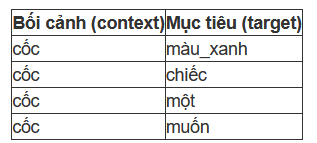

Các nghiên cứu cho thấy từ mục tiêu sẽ được giải thích tốt hơn nếu được học theo các từ bối cảnh. Do đó mô hình skip-grams tìm cách xây dựng một thuật toán học có giám sát có đầu vào là các từ bối cảnh –> đầu ra là từ mục tiêu:

In [ ]:
!pip install keras tensorflow

In [ ]:
# import
import keras.preprocessing.text as text
import keras.utils as np_utils
import keras.preprocessing.sequence as sequence
from nltk.corpus import gutenberg
from string import punctuation
import nltk

In [ ]:
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
norm_bible = gutenberg.sents('bible-kjv.txt')
norm_bible = [' '.join(doc) for doc in norm_bible]
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(norm_bible)
word2id = tokenizer.word_index

In [ ]:
# build vocabulary of unique words
word2id['PAD'] = 0
id2word = {v:k for k, v in word2id.items()}
vocab_size = len(word2id)

print('Vocabulary Size:', vocab_size)
print('Vocabulary Sample:', list(word2id.items())[:10])
print(id2word)

Vocabulary Size: 12746
Vocabulary Sample: [('the', 1), ('and', 2), ('of', 3), ('to', 4), ('that', 5), ('in', 6), ('he', 7), ('shall', 8), ('unto', 9), ('for', 10)]
{1: 'the', 2: 'and', 3: 'of', 4: 'to', 5: 'that', 6: 'in', 7: 'he', 8: 'shall', 9: 'unto', 10: 'for', 11: 'i', 12: 'his', 13: 'a', 14: 'lord', 15: 'they', 16: 'be', 17: 'is', 18: 'him', 19: 'not', 20: 'them', 21: 'it', 22: 'with', 23: 'all', 24: 'thou', 25: 'thy', 26: 'was', 27: 'god', 28: 'which', 29: 'my', 30: 'me', 31: 'said', 32: 'but', 33: 'ye', 34: 'their', 35: 'have', 36: 'will', 37: 'thee', 38: 'from', 39: 'as', 40: 'are', 41: 'when', 42: 'this', 43: '1', 44: 'out', 45: 'were', 46: 'upon', 47: 'man', 48: '2', 49: 'by', 50: 'you', 51: 'israel', 52: '3', 53: 'king', 54: '4', 55: 'son', 56: 'up', 57: '7', 58: '5', 59: 'there', 60: '6', 61: 'hath', 62: '9', 63: '8', 64: 'then', 65: 'people', 66: '10', 67: '11', 68: 'came', 69: 'had', 70: 'house', 71: "'", 72: 'into', 73: 'on', 74: 'her', 75: 'come', 76: 'one', 77: '12', 

Bước 2: Mã hoá toàn bộ các câu văn bằng index.

In [ ]:
wids = [[word2id[w] for w in text.text_to_word_sequence(doc)] for doc in norm_bible]
print('Embedding sentence by index: ', wids[:5])

Embedding sentence by index:  [[1, 53, 1342, 6058], [1, 280, 2678, 3, 1, 53, 1342, 6058], [1, 254, 448, 3, 162, 194, 8769], [43, 43, 6, 1, 734, 27, 1368, 1, 205, 2, 1, 139], [43, 48, 2, 1, 139, 26, 258, 2085, 2, 2086, 2, 551, 26, 46, 1, 266, 3, 1, 1030]]


Bước 3: Xác định Context --> Target

In [ ]:
import numpy as np
def generate_context_word_pairs(corpus, window_size, vocab_size):
    context_length = window_size*2
    for words in corpus:
        sentence_length = len(words)
        # print('words: ', words)
        for index, word in enumerate(words):
            context_words = []
            label_word   = []
            # Start index of context
            start = index - window_size
            # End index of context
            end = index + window_size + 1
            # List of context_words
            context_words.append([words[i] for i in range(start, end) if 0 <= i < sentence_length and i != index])
            # List of label_word (also is target word).
            # print('context words {}: {}'.format(context_words, index))
            label_word.append(word)
            # Padding the input 0 in the left in case it does not satisfy number of context_words = 2*window_size.
            x = sequence.pad_sequences(context_words, maxlen=context_length)
            # print('context words padded: ', x)
            # Convert label_word into one-hot vector corresponding with its index
            y = np_utils.to_categorical(label_word, vocab_size)
            yield (x, y)


# Test this out for some samples
i = 0
window_size = 2 # context window size
for x, y in generate_context_word_pairs(corpus=wids, window_size=window_size, vocab_size=vocab_size):
    if 0 not in x[0]:
        print('Context (X):', [id2word[w] for w in x[0]], '-> Target (Y):', id2word[np.argwhere(y[0])[0][0]])

        if i == 10:
            break
        i += 1

Context (X): ['the', 'old', 'of', 'the'] -> Target (Y): testament
Context (X): ['old', 'testament', 'the', 'king'] -> Target (Y): of
Context (X): ['testament', 'of', 'king', 'james'] -> Target (Y): the
Context (X): ['of', 'the', 'james', 'bible'] -> Target (Y): king
Context (X): ['the', 'first', 'of', 'moses'] -> Target (Y): book
Context (X): ['first', 'book', 'moses', 'called'] -> Target (Y): of
Context (X): ['book', 'of', 'called', 'genesis'] -> Target (Y): moses
Context (X): ['1', '1', 'the', 'beginning'] -> Target (Y): in
Context (X): ['1', 'in', 'beginning', 'god'] -> Target (Y): the
Context (X): ['in', 'the', 'god', 'created'] -> Target (Y): beginning
Context (X): ['the', 'beginning', 'created', 'the'] -> Target (Y): god


Bước 4: Xây dựng mạng nơ ron gồm 3 layers chính:

- Embedding layer: dùng để mã hoá đầu vào thành các one-hot véc tơ. Số lượng từ ở đầu vào chính là 2*window_size. Sau khi mã hoá, qua quá trình training mỗi một từ vựng sẽ được biểu diễn bởi một véc tơ nhúng 100 chiều tương ứng với embed_size.
- Mean layer: Tính véc tơ trung bình của các véc tơ đầu ra ở Embedding layer. Số lượng véc tơ là 2*window_size.
- Dense layer: Tính phân phối xác xuất của từ Target dựa vào hàm softmax.


In [ ]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda
embed_size = 100

# build CBOW architecture
cbow = Sequential()
cbow.add(Embedding(input_dim=vocab_size, output_dim=embed_size, input_length=window_size*2))
cbow.add(Lambda(lambda x: K.mean(x, axis=1), output_shape=(embed_size,)))
cbow.add(Dense(vocab_size, activation='softmax'))
cbow.compile(loss='categorical_crossentropy', optimizer='rmsprop')

# view model summary
print(cbow.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4, 100)            1274600   
                                                                 
 lambda (Lambda)             (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 12746)             1287346   
                                                                 
Total params: 2561946 (9.77 MB)
Trainable params: 2561946 (9.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Bước 5: Huấn luyện mô hình. Chúng ta sẽ huấn luyện mô hình dựa trên 100 câu văn đầu tiên và trải qua 5 epochs.

In [ ]:
for epoch in range(1, 6):
    loss = 0.
    i = 0
    for x, y in generate_context_word_pairs(corpus=wids[:100], window_size=window_size, vocab_size=vocab_size):
        i += 1
        loss += cbow.train_on_batch(x, y)
        if i % 500 == 0:
            print('Processed {} (context, word) pairs'.format(i))

    print('Epoch:', epoch, '\tLoss:', loss)

Processed 500 (context, word) pairs
Processed 1000 (context, word) pairs
Processed 1500 (context, word) pairs
Processed 2000 (context, word) pairs
Processed 2500 (context, word) pairs
Epoch: 1 	Loss: 23691.161151885986
Processed 500 (context, word) pairs
Processed 1000 (context, word) pairs
Processed 1500 (context, word) pairs
Processed 2000 (context, word) pairs
Processed 2500 (context, word) pairs
Epoch: 2 	Loss: 20972.956507503986
Processed 500 (context, word) pairs
Processed 1000 (context, word) pairs
Processed 1500 (context, word) pairs
Processed 2000 (context, word) pairs
Processed 2500 (context, word) pairs
Epoch: 3 	Loss: 20144.23772738874
Processed 500 (context, word) pairs
Processed 1000 (context, word) pairs
Processed 1500 (context, word) pairs
Processed 2000 (context, word) pairs
Processed 2500 (context, word) pairs
Epoch: 4 	Loss: 19589.06774847582
Processed 500 (context, word) pairs
Processed 1000 (context, word) pairs
Processed 1500 (context, word) pairs
Processed 2000 (

Bứơc 6: Trích xuất ma trận nhúng của các từ

In [ ]:
import pandas as pd
weights = cbow.get_weights()[0]
weights = weights[1:]
print(weights.shape)

pd.DataFrame(weights, index=list(id2word.values())[1:]).head()

(12745, 100)


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
and,-0.243191,-1.015014,1.190282,-1.548120,-1.654102,-0.661382,-0.823366,-0.917825,0.590329,-0.865148,...,0.628269,0.729492,0.131777,1.145895,-0.396053,1.004220,-1.170763,1.221981,1.633887,1.994573
of,-1.028625,-1.018908,1.056593,1.201353,-2.263147,-0.817364,-0.577848,1.596376,0.892005,-0.828288,...,1.020432,1.131111,-2.128532,0.811921,-1.372989,0.639982,-0.778894,0.710730,0.959024,1.078570
to,-0.471635,-0.246257,0.227027,0.426154,-1.137801,-0.182098,-0.355573,0.862471,0.180102,-0.164884,...,0.466024,0.761870,-1.309387,0.343199,-0.418892,0.260932,-0.359405,0.415846,0.464899,-0.243613
that,-0.280636,-0.326902,0.345630,0.096571,-0.332582,-0.303059,-0.371198,0.158681,0.459086,-0.263936,...,0.328819,0.522419,-0.434877,0.344260,-0.472472,0.251776,-0.280926,0.448099,0.420793,0.360658
in,-0.350011,-0.413141,0.343427,0.108121,-0.752737,-0.290117,-0.146546,0.105610,0.286450,-0.186823,...,0.218142,0.479901,-0.558899,0.333117,-0.267654,0.482027,-0.290418,0.477418,0.450117,0.311594


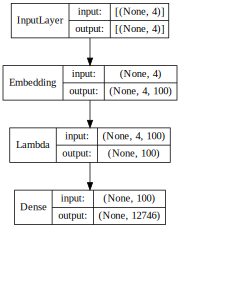

In [ ]:
# visualize model structure
from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

SVG(model_to_dot(cbow, show_shapes=True, show_layer_names=False,
                 rankdir='TB').create(prog='dot', format='svg'))

## Xây dựng kiến trucs của mô hình skipgram